In [12]:
# task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns

In [5]:
df = pd.read_csv("DS2_C6_S5_Insurance_Data_Challenge.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [14]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

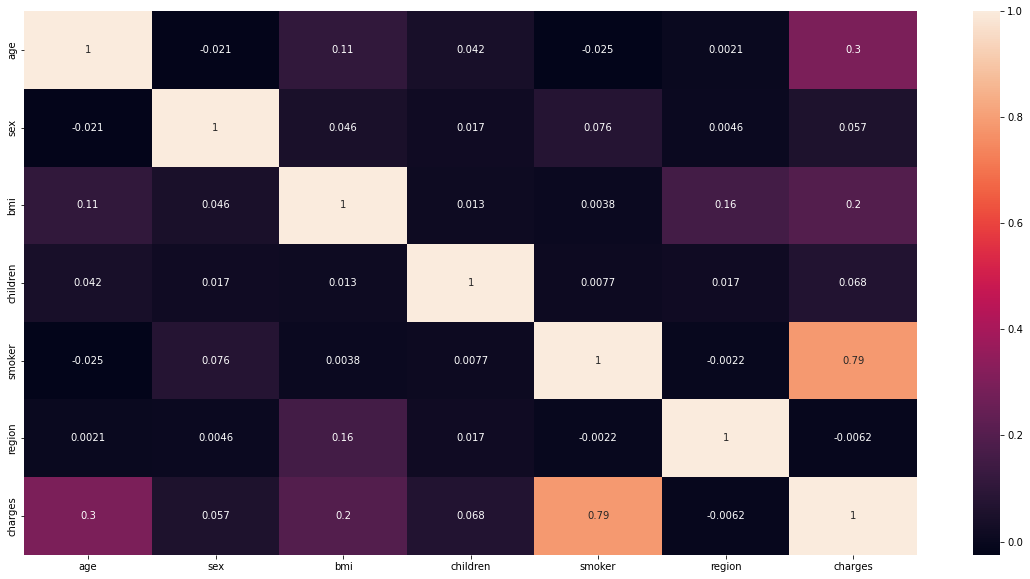

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='sex', ylabel='count'>

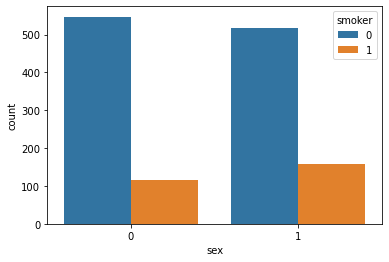

In [21]:
# task 2

#a

sns.countplot(x = df['sex'] , hue  = df['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

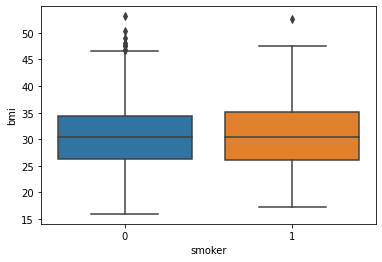

In [24]:
# b

sns.boxplot(y = df['bmi'] , x  = df['smoker'])

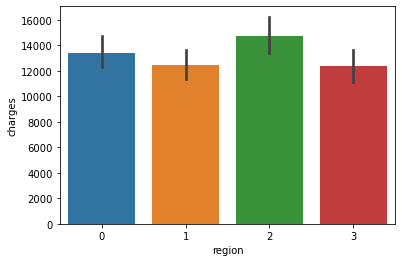

In [26]:
# c

sns.barplot(x = df['region'] , y =  df['charges']);

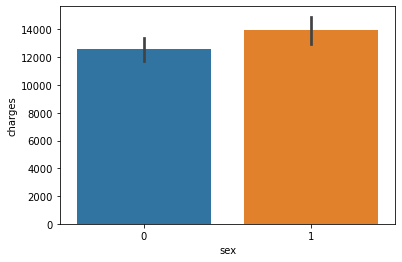

In [27]:
# d

sns.barplot(x = df['sex'] , y =  df['charges']);

In [31]:
# task 3

pcns=PCA(n_components=3)
pcdf=pd.DataFrame(pcns.fit_transform(df),columns=['PC1','PC2','PC3'])
pcdf

,PC1,PC2,PC3
0,3614.494223,21.550066,-2.443885
1,-11544.876260,17.068609,4.783372
2,-8820.963333,8.044083,3.472477
3,8714.044814,9.487635,-8.555040
4,-9403.569139,3.971586,-0.740300
...,...,...,...
1333,-2669.870006,-11.734737,0.209698
1334,-11064.447985,17.293154,2.827524
1335,-11640.594756,16.944296,7.866128
1336,-11262.483344,14.405600,-3.265171


In [32]:
pcns.explained_variance_ratio_

array([9.99998510e-01, 1.22666199e-06, 2.42985014e-07])

In [35]:
# task 4
cols =['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# kmeans

def make_kmeans(attributes=cols,scaler=MinMaxScaler(),dimension_reduction='pca',components=2,k=3,               show='features'):
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values=scaled_values
    
    cluster=KMeans(n_clusters=k).fit_predict(values)
    
    if show =='features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show =='values':
        df_plot=pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}                 , vars=[c for c in df_plot.columns if c != 'cluster'])
    

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()),('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),('without', None)],description='Dimensionality Reduction', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show',layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True) )  

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…

In [36]:
# agglomerative



def make_Agglomerative(attributes=cols,scaler=MinMaxScaler(),dimension_reduction='pca',components=2,k=3,linkage='ward',show='features'):
    
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values=scaled_values
    
    cluster=AgglomerativeClustering(n_clusters=k,linkage=linkage).fit_predict(values)
    
    if show =='features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show =='values':
        df_plot=pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}                 , vars=[c for c in df_plot.columns if c != 'cluster'])
    

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_Agglomerative, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()),('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),('without', None)],description='Dimensionality Reduction', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True),linkage=widgets.RadioButtons(options=[('SINGLE', 'single'), ('COMPLETE', 'complete'),('AVERAGE', 'average'),('WARD', 'ward')],description='Linkage', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show',layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True) )    

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…

In [37]:
# dbscan

def make_dbscan(attributes=cols, scaler=MinMaxScaler(), dimension_reduction=None, components=2, eps=.5,min_samples=5, show='features'):
    
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
 
    cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
    print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
 
    if show == 'features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show == 'values':
        df_plot = pd.DataFrame(values)
 
    df_plot['cluster'] = cluster
 
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

i = interact(make_dbscan, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()),('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('without', None)],description='Dimensionality Reduction', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , components=widgets.SelectionSlider(options=range(1, 5), value=4,description='Number components', layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5,description='Epsilon', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , min_samples=widgets.SelectionSlider(options=range(1, 20), value=5,description='Min. samples', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True))

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…